In [1]:
import os.path as osp
import numpy as np
import numpy.linalg as npla
import scipy.spatial.transform as sptf
np.set_printoptions(6, suppress=True)
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib widget
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "serif",
    "font.serif": ["Times"],
    'font.size': 14,
})

from pylgmath import se3op

import utils

def load_pred_poses(filename):
    data = np.loadtxt(filename)
    poses = []
    for v in data:
        T_ms = np.eye(4)
        T_ms[:3, :] = v.reshape(3, 4)
        poses.append(T_ms)
    return np.array(poses)

def load_gt_poses(filename):
    data = np.loadtxt(filename)
    poses = []
    for v in data:
        T_ms = np.eye(4)
        T_ms[:3, :] = v.reshape(3, 4)
        poses.append(T_ms)
    return np.array(poses)

gt_path = '/media/yuchen/T7/ASRL/data/kitti_raw'
pred_path = '/home/yuchen/ASRL/temp/doppler_odometry/kitti_raw'
sequences = ['00', '01', '02', '03', '04', '05', '06', '07', '08', '09', '10']

In [23]:
sequence = sequences[10]

gt_poses = load_gt_poses(osp.join(gt_path, sequence, sequence+'.txt'))

pred_file = 'elastic'
pred_poses = load_pred_poses(osp.join(pred_path, pred_file, sequence+'_poses.txt'))
assert len(gt_poses) == len(pred_poses)
t_err_2d, r_err_2d, t_err, r_err = utils.evaluate_odometry(gt_poses, pred_poses)
print(f"{pred_file} & {t_err_2d:.2f} & {r_err_2d:.4f} & {t_err:.2f} & {r_err:.4f} \\\\")

pred_file = 'steam_0807_1'
pred_poses = load_pred_poses(osp.join(pred_path, pred_file, sequence+'_poses.txt'))
assert len(gt_poses) == len(pred_poses)
t_err_2d, r_err_2d, t_err, r_err = utils.evaluate_odometry(gt_poses, pred_poses)
print(f"{pred_file} & {t_err_2d:.2f} & {r_err_2d:.4f} & {t_err:.2f} & {r_err:.4f} \\\\")

elastic & 0.42 & 0.0005 & 0.49 & 0.0014 \\
steam_0807_1 & 0.46 & 0.0004 & 0.54 & 0.0015 \\


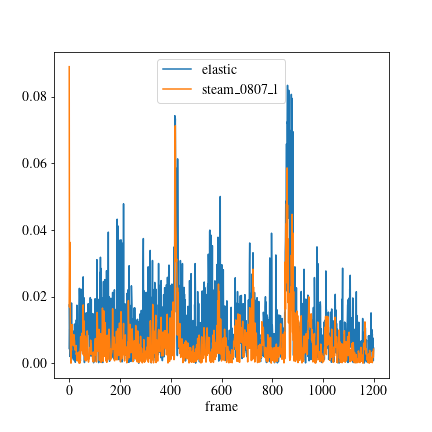

In [25]:
sequence = sequences[10]

fig, ax = plt.subplots(1, 1, figsize=(6, 6))

error_file = 'elastic'
error = np.abs(np.loadtxt(osp.join(pred_path, error_file, sequence+'_eval.txt'))[:, 0])
ax.plot(error, label=error_file)

error_file = 'steam_0807_1'
error = np.loadtxt(osp.join(pred_path, error_file, sequence+'_eval.txt'))
ax.plot(error, label=error_file)

ax.set_xlabel('frame')
ax.legend()

plt.show()